# Mapas Auto-Organizáveis(SOM) - Agrupamento

In [52]:
import pandas as pd
from minisom import MiniSom

## Obter os dados

In [88]:
base_X = pd.read_csv("entradas-breast.csv")

In [ ]:
# Como é um problema de agrupamento não-supervisionado apenas não se vai utilizar a base_X.
base_y = pd.read_csv("saidas-breast.csv")

## Divisão dos dados

In [89]:
X = base_X.iloc[:, 0:30].values

In [91]:
X.shape

(569, 30)

In [93]:
y = base_y.iloc[:,0].values

In [95]:
y.shape

(569,)

## Pré-Processamento dos dados- Normalização das Variaveis

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
# Passar os dados de entrada para uma escala de 0 a 1 para que o processamento dos dados seja mais rapido e tambem para não 
# haver variaveis que pela sua escala tenham mais influência no modelo(para não haver variáveis dominantes).
scaler = MinMaxScaler(feature_range=(0,1))

In [98]:
# Ajustar a variavel X para fazer a sua normalização.
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [99]:
# Normalização da variavel X.
X = scaler.transform(X)

## Modelo do Mapa Auto-Organizável

In [100]:
# Algoritmo utilizado para agrupamento(como o k-means) que utiliza redes neurais. Tambem pode ser utilizado para redução de
# dimensionalidade

# Tem uma camada de entrada(com os atributos de entrada) directamente ligada a camada de saida. Cada neuronio da camada
# de entrada está directamente ligado a todos os neuronios da camada de saida(rede neural densa). A camada  de saida é uma 
# matriz.

# Calculo do tamanho da matriz de saida (SOM-self organizing map):5xsqr(N), sendo N o nº de registros.
# Por exemplo para 569 registros: 5xsqr(569) = 119,27 celulas = matriz 11x11.

# A diferença para as redes neurais tradicionais reside no facto de não haverem cadamas ocultas nem se utilizar funções de 
# activação, nem se multiplicam os valores de entrada pelos pesos.
# Nos mapas auto organizáveis os pesos representam o valor do atributo da camada de entrada.
# por exemplo: 
# 1º registro: idade:21, salario: 1800
# 2 registro: idadde:20, salario: 1500
# Os pesos apenas representam nós. Por exemplo numa camada de entrada com 2 atributos. No nó 1(neuronio 1) da camada de saida
# tem-se o valor do peso 1, relacionado com o 1º atributo do 1º registro e o valor do peso 2, relacionado com o 2º atributo do
# 1º registro. Nó 1: (P1,1:P1,2). 
# No nó 2(neuronio 2) da camada de saida tem-se o valor do peso 1, relacionado com o 1º atributo do 2º registro e o valor do 
# peso 2, relacionado com o 2º atributo do 2º registro. Nó 2: (P2,1:P2,2).

# 1º)----------------------------------------------------------------------------------------
# Os nós sao inicializados aleatoriamente: pr ex. Nó 1: (30,3000) e Nó 2: (15,1000).
# Calcula-se a distancia eucladiana entre cada registro da base de dados e cada nó inicializado aleatoriamente(como no k-means
# com os registros da base de dados a funcionar de centrides).
# Para o 1º registro e nó 1: sqr(21-30)^2+(1800-3000)^2=0.22
# Para o 1º registro e nó 2: sqr(21-15)^2+(1800-1000)^2=0.10
# Para o 2º registro e nó 1: sqr(20-30)^2+(1500-3000)^2
# Para o 2º registro e nó 2: sqr(20-15)^2+(1500-1000)^2

# 2º)----------------------------------------------------------------------------------------------------------
# Selecciona-se o nó(ponto) que está mais proximo(mais semelhante) de cada registro e atribui-se o nome de BMU-best match unit
# Para o 1º registro seria o nó 2(distancia de 0.10).

# 3º)---------------------------------------------------------------------------------------------------------
# De seguida para os nós que não forem escolhidos para BMU cacula-se a distancia eucladiana entre esse nó e os BMU existentes. 
# Considera-se que esse nó pertence ao agrupamento do BMU que estiver mais proximo.

# Um registro da base de dados pode estar associado a somente um BMU, mas um BMU pode estar associado a vários registros

# 4º)---------------------------------------------------------------------------------------------------------------
# A aprendizagem do modelo é feita aproximando o valor dos BMU dos registros de entrada(inicialmente os valores dos BMU foram
# obtidos através da inicialização aleatoria dos pesos).
# Ao se aproximar os valores dos BMU aos registros de entrada , tambem se está a aproximar os nós restantes (que não foram 
# escolhidos para BMU) aos seus valores de entrada.

# Esta aproximação entre o BMU e o registro é feita obtendo a diferença entre os dois valores e incrementando uma parcela desta
# diferença no BMU ponderada por um fator chamado de taxa de aprendizagem que tem como objectivo suavizar o processo de ajuste 
# dos neurônios nos dados. Obtem-se assim o novo valor do nó para os BMU.
# n,novo = n+a*(d-n)
# Onde: 
# n,novo: é o novo valor neurónio do BMU
# n: é o valor do neuronio do BMU
# a: taxa de aprendizagem
# d: registro
# n: neuronio BMU

# Se a=0.5, n,novo = (n+d)/2. A nova posição de n é a media da sua antiga posição com a posição do registro.
# Se a=1, n,novo=d. A nova posição de n é a mesma possição do registro.

# 5º)------------------------------------------------------------------------------------------------------------------
# De seguida também os pontos vizinhos são aproximados do BMU. Na atualização dos vizinhos será considerado mais um fator de 
# ponderação descrito por uma função chamada função de vizinhança, que produzirá valores menores quando o BMU e o neuronio 
# vizinho forem mais distantes no espaço matricial (látice). Obtem-se o novo valor do nó para os pontos vizinhos dos BMU.

# Na maioria dos casos ainda existe mais um parâmetro destas funções que é o raio que aumenta ou diminui os valores da função
# de vizinhança.

# n,novo = nv,novo = nv+a*(nBMU, nv)a*(d-nv)
# Onde: 
# nv,novo: é o novo valor do neurónio de vizinhança
# nv: é o valor do neuronio de vizinhança
# a*(nBMU, nv): função de vizinhança
# a: taxa de aprendizagem
# d: registro
# n: neuronio de vizinhança

# 6º)------------------------------------------------------------------------------------------------------------------------
# De seguida volta-se a repetir os passos iterativamente começando por calcular a distancia eucladiana entre cada registro da 
# base de dados e cada nó(com os valores dos nós obtidos na iteração anterior).
# No número de epocas define-se quantas vezes se vai fazer o ajuste dos pesos.

# Inicializar os pesos, criar os nós para cada célula/neurônio, calcular a distância de cada registro para nó e escolher o 
# neurônio BMU. De seguida trazer os neurônios para mais perto da camada de entrada.

#------------------------------------------------------------------------------------------------------------------------------
# x: numero de linhas da matriz de saida
# y: numero de colunas da matriz de saida
# input_ten: numero de variaveis de entrada
# sigma: Alcançe do raio traçado com o centro nos BMU e utilizado para a actualização dos seus vizinhos. 
# learning_rate: taxa de aprendizagem utilizada para a actualização do BMU e aproximação do seu valor ao valor do registro (e
# consequente actualização dos valores vizinhos).
# random_seed: Obter sempre o mesmo resultado para o modelo. A inicialização dos pesos tem sempre o mesmo valor.

# ransom_weights_init: Inicialização dos pesos da base de dados
# train_random: Treinar o modelo (num_iteration = número de epocas)


model = MiniSom(x=11, y=11, input_len=30, sigma=3, learning_rate=0.5, random_seed=0)
model.random_weights_init(X)
model.train_random(data=X, num_iteration=1000)

## Visualização dos resultados

### Mapa Auto-Organizável

In [101]:
from pylab import pcolor, colorbar, plot

In [102]:
# Lista com os marcadores
# "o" neurónio pertence à classe 0
# "s" neurónio pertence à classe 1
markers = ["o","s"]

In [103]:
# Lista com as cores
# "r" neurónio pertence à classe 0
# "g" neurónio pertence à classe 1
colors = ["r","g"]

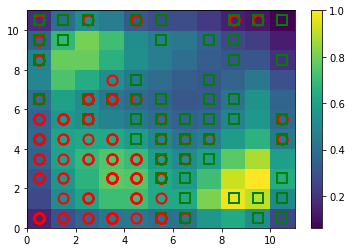

In [108]:
# O processo de agrupamento nessa base de dados é mais complicado porque os dados são muito heterogêneos, o que origina vários
# neurónios pertencentes às 2 classes.

# i: indice de X
# x: linha inteira de X
# w: BMU de cada linha

# (+0.5)posicionar o simblo no meio do neurónio

pcolor(model.distance_map().T)
colorbar()

for i,x in enumerate(X):
    #print(i)
    #print(x)
    w = model.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor="None", 
    markersize=10, markeredgecolor=colors[y[i]], markeredgewidth=2) 